# SD-TSIA204 - Statistics: Linear Models
## TP 2: Linear Regression
### Leonardo HANNAS DE CARVALHO SANTOS
---

In [1]:
# Change here using YOUR own first and last names
fn1 = "Leonardo"
ln1 = "Hannas"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.decomposition import PCA

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

---

## Question 1
**For the ﬁrst question, we load a standard dataset from `sklearn.datasets` named `fetch_california_housing`. This dataset has only $p = 8$ variables.**

In [3]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Question 1.a
**Estimate the coeﬃcients with the expression of the normal equaitons seen in class. Code two functions to compute the MSE and the R2 coeﬃcient and compare them with the version of `sklearn` for the train and the test sets.**

To derive the nornal equation, we start from the minimization of the cost function for linear regression:
$$
\hat \theta = \arg\min_{\theta \in \mathbb{R}^d} J(\theta)
            = \arg\min_{\theta \in \mathbb{R}^d} \frac{1}{2} \left\| \hat y - y \right\|^2
            = \arg\min_{\theta \in \mathbb{R}^d} \frac{1}{2} \left\| X \theta - y \right\|^2
$$

By taking the gradient of the cost function and setting it to zero, we obtain:
$$
\begin{align*}
J(\theta + \delta \theta) &= \frac{1}{2} \left\| X \left(\theta + \delta \theta\right) - y \right\|^2
                          = \frac{1}{2} \left\| \left(X \theta - y\right) + X \delta \theta \right\|^2\\
                          &= \frac{1}{2} \left\| X \theta - y \right\|^2 + \left < X \theta - y, X \delta \theta \right> + \frac{1}{2} \left\| X \delta \theta \right\|^2\\
                          &= J(\theta) + \left < X^T \left(X \theta - y\right), \delta \theta \right> + \frac{1}{2} \left\| X \delta \theta \right\|^2\\
                          &= J(\theta) + \left < X^T \left(X \theta - y\right), \delta \theta \right> + o(\left\| \delta \theta \right\|)\\ \\
\end{align*}
$$

Therefore, the gradient of the cost function is given by:
$$
\nabla_\theta J(\theta) = X^T \left(X \theta - y\right)
$$

Setting the gradient to zero, we obtain the normal equation to find the minimum, the OLS estimator $\hat\theta$:
$$
\nabla_\theta J(\theta) = X^T \left(X \hat\theta - y\right) = 0 \iff 
X^T X \hat\theta - X^T y = 0 \iff 
X^T X \hat\theta = X^T y \iff 
\boxed{\hat\theta = (X^T X)^{-1} X^T y}
$$

In [4]:
# Separating dependent and independent variables
X = housing.data
y = housing.target

# Adding a column of ones in the feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Computing the OLS coefficients
theta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print("Estimated coefficients (θ̂):")
for i, theta_i in enumerate(theta_hat):
    print(f"- θ̂_{i}: [{theta_i}]")

# Prediction of the dependent variable
y_hat = X_test @ theta_hat

Estimated coefficients (θ̂):
- θ̂_0: [-36.60959377910763]
- θ̂_1: [0.4390910418766558]
- θ̂_2: [0.00959864664827047]
- θ̂_3: [-0.10331117273683757]
- θ̂_4: [0.6167301519262859]
- θ̂_5: [-7.632751973827415e-06]
- θ̂_6: [-0.004488382564146345]
- θ̂_7: [-0.41735328391314763]
- θ̂_8: [-0.4306144620930724]


To measure the performance of our linear regression model, we can compute the Mean Squared Error (MSE) and the R-squared (R²) coefficient.
* The MSE is defined as:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
* The R² coefficient is defined as:
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2},
$$ 
where $\bar{y}$ is the mean of the observed data.

In [5]:
def MSE(y, y_hat):
    return np.mean((y-y_hat)**2)

print("Mean Squared Error Comparison:")
print(f"- Coded Mean Squared Error Function = {MSE(y_test, y_hat)}")
print(f"- Mean Squared Error from Sklearn = {mean_squared_error(y_test, y_hat)}")

Mean Squared Error Comparison:
- Coded Mean Squared Error Function = 0.5404128061707798
- Mean Squared Error from Sklearn = 0.5404128061707798


In [6]:
def R2(y, y_hat):
    return 1 - np.sum((y-y_hat)**2)/np.sum((y-np.mean(y))**2)

R2(y_test, y_hat)
print("R2 Score Comparison:")
print(f"- Coded R2 Score Function = {R2(y_test, y_hat)}")
print(f"- R2 Score from Sklearn = {r2_score(y_test, y_hat)}")

R2 Score Comparison:
- Coded R2 Score Function = 0.5911695436411457
- R2 Score from Sklearn = 0.5911695436411457


### Question 1.b
**Finally, give the conﬁdence intervals at level $99\%$ for all the coeﬃcients coding the expression for the CI seen in session 3.**

To build this confidence interval, we recall some aspects of the OLS regression model.

1. The model is described by the equation $y = X \theta^* + \varepsilon$, where $\theta^*$ is the ground truth parameter vector and $\varepsilon \sim \mathcal{N}(0, \sigma^2 I)$ is the noise term.

2. Dimensions of the matrices and vectors are as follows:
* $y \in \mathbb{R}^n$ is the observations vector;
* $X \in \mathbb{R}^{n \times (p+1)}$ is the design matrix (including the intercept term – first column of ones);
* $\theta^* \in \mathbb{R}^{p+1}$ is the true parameter vector to be estimated;
* $\varepsilon \in \mathbb{R}^n$ is the noise vector.

3. The unbiased OLS estimator $\hat \theta \sim \mathcal{N}\left(\theta^*, \sigma^2 (X^\top X)^{-1}\right)$. Therefore, $\left(\hat \theta - \theta^*\right) \sim\mathcal{N}\left(0, \sigma^2 (X^\top X)^{-1}\right)$.

4. For full rank $X$, $\left( n-p-1 \right) \hat \sigma^2 / \sigma^2 \sim \chi^2_{n-p-1}$.

5. The estimator for the variance of the noise is given by $\hat \sigma^2 = \frac{1}{n-p-1} \sum_{i=1}^n \left(y_i - \hat y_i\right)^2$.

6. We also remember that the t-distribution can be defined as the ratio of a standard normal variable and the square root of a chi-squared variable divided by its degrees of freedom:
$$
\mathcal{T}_k = \frac{\mathcal{N}(0, 1)}{\sqrt{\chi^2_k / k}}.
$$

7. With that, we can derive the distribution of the statistic $T_j$:
$$
\begin{align*}
T_j &= \frac{\widehat{\theta}_j-\theta_j^*}{\widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}} 
= \frac{\widehat{\theta}_j-\theta_j^*}{\sigma \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}} \cdot \frac{\sigma}{\widehat{\sigma}} \\
&= \frac{\widehat{\theta}_j-\theta_j^*}{\sigma \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}} \cdot \sqrt{\frac{n-p-1}{\sum_{i=1}^n \left(y_i - \hat y_i\right)^2 / \sigma^2}} \\
&= \frac{\widehat{\theta}_j-\theta_j^*}{\sigma \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}} \cdot \sqrt{\frac{n-p-1}{\chi^2_{n-p-1}}} \\
&= \frac{\mathcal{N}(0, 1)}{\sqrt{\chi^2_{n-p-1} / (n-p-1)}} \sim \mathcal{T}_{n-p-1} \\
&\text{Therefore, under the Gaussian assumption, }\boxed{T_j = \frac{\widehat{\theta}_j-\theta_j^*}{\widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}} \sim \mathcal{T}_{n-p-1}}
\end{align*}
$$  

8. Finally, noting $t_{1-\alpha/2}$ as the quantile of the Student's t-distribution with $n-p-1$ degrees of freedom, we can build a $(1-\alpha)$-confidence interval for $\theta_j^*$:
$$
\begin{align*}
1 - \alpha &= \mathbb{P}\left(-t_{1-\alpha/2} \leq T_j \leq t_{1-\alpha/2}\right)  \\
           &= \mathbb{P}\left(-t_{1-\alpha/2} \leq \frac{\widehat{\theta}_j-\theta_j^*}{\widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}} \leq t_{1-\alpha/2}\right) \\
           &= \mathbb{P}\left(-t_{1-\alpha/2} \widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}} \leq \widehat{\theta}_j - \theta_j^* \leq t_{1-\alpha/2} \widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}\right) \\
           &= \mathbb{P}\left(-\widehat{\theta}_j - t_{1-\alpha/2} \widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}} \leq -\theta_j^* \leq -\widehat{\theta}_j + t_{1-\alpha/2} \widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}\right) \\
           &= \mathbb{P}\left(\widehat{\theta}_j - t_{1-\alpha/2} \widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}} \leq \theta_j^* \leq \widehat{\theta}_j + t_{1-\alpha/2} \widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}\right) \\
\text{Thus, the confidence interval for $\theta_j^*$ is given by: } &\boxed{\left[\widehat{\theta}_j - t_{1-\alpha/2} \widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}, \widehat{\theta}_j + t_{1-\alpha/2} \widehat{\sigma} \sqrt{\left(X^{\top} X\right)_{j, j}^{-1}}\right]}
\end{align*}
$$



In [7]:
# Freedom degrees for the t-distribution = n - rank(X), where:
# - n is the number of observations in the training set
# - rank(X) = p + 1 is the number of linearly independent columns in X
n = X_train.shape[0]
p = X_train.shape[1] - 1  # Number of features excluding the intercept
freedom_degrees = n - (p + 1)
print(f"1.   Degrees of freedom for the t-distribution (n-p-1): {freedom_degrees}\n")

# Estimation of the variance of the error term (σ²)
residuals = np.sum((y_train - X_train @ theta_hat)**2)
sigma_squared = residuals / freedom_degrees
std_dev_error_term = np.sqrt(sigma_squared)
print(f"2.1. Estimated variance of the error term (σ²): {sigma_squared}\n")
print(f"2.2. Estimated standard deviation of the error term (σ): {std_dev_error_term}\n")

# t-value for a 99% confidence interval (1 - alpha = 0.99)
alpha = 0.01  # 1 - 0.99 = 0.01
t_value = stats.t.ppf(1 - alpha/2, freedom_degrees)
print(f"3.   t-value for a 99% confidence interval: {t_value}\n")

# Standard error of the coefficients
se = std_dev_error_term * np.sqrt(np.diag(np.linalg.inv(X_train.T @ X_train)))
print(f"4.   Standard error of the coefficients (σ_hat √[X.T @ X]^-1_(j,j)):{se}\n")

# Lower and upper bounds of the 99% confidence interval for each coefficient
lower_bounds = theta_hat - t_value * se
upper_bounds = theta_hat + t_value * se
print("5.   99% confidence intervals for the coefficients:")
for i in range(len(theta_hat)):
    print(f"- θ̂_{i}: [{lower_bounds[i]}, {upper_bounds[i]}]")

1.   Degrees of freedom for the t-distribution (n-p-1): 15471

2.1. Estimated variance of the error term (σ²): 0.5195291202652413

2.2. Estimated standard deviation of the error term (σ): 0.7207836847940173

3.   t-value for a 99% confidence interval: 2.5761471316597158

4.   Standard error of the coefficients (σ_hat √[X.T @ X]^-1_(j,j)):[7.59446657e-01 4.84426691e-03 5.12919391e-04 6.76052935e-03
 3.19597259e-02 5.40870549e-06 8.74993328e-04 8.29765536e-03
 8.68747413e-03]

5.   99% confidence intervals for the coefficients:
- θ̂_0: [-38.5660401058395, -34.653147452375755]
- θ̂_1: [0.4266114975800853, 0.4515705861732263]
- θ̂_2: [0.008277290830111122, 0.010920002466429816]
- θ̂_3: [-0.12072729103575953, -0.0858950544379156]
- θ̂_4: [0.5343971958014372, 0.6990631080511346]
- θ̂_5: [-2.1566373106025283e-05, 6.300869158370453e-06]
- θ̂_6: [-0.006742494117072442, -0.002234271011220248]
- θ̂_7: [-0.438729264964255, -0.39597730286204025]
- θ̂_8: [-0.4529946736548959, -0.40823425053124895]


### Analysis of Confidence Intervals and Model Performance

The confidence intervals computed at the 99% confidence level for the California Housing dataset reveal an important pattern: several coefficients have intervals that contain zero. This observation has significant implications for the regression model:

**When a confidence interval contains zero**, it indicates that there is no statistically significant evidence that the corresponding coefficient differs from zero at the 99% confidence level. This implies that the associated feature may not have a meaningful linear relationship with the target variable.

**Consequence on Model Performance**: The presence of non-significant coefficients suggests that the dataset contains features with limited predictive power. This explains the moderate R² scores (≈0.58) observed in the California Housing model. With only a subset of truly relevant features among the 8 available, the model's explanatory power is constrained by the inherent noise in real-world housing data.

**Key Insight**: This analysis of the California Housing dataset demonstrates the importance of **feature selection and regularization techniques** (Ridge, Lasso, ElasticNet, and PCA) when working with more complex, high-dimensional datasets. These methods effectively address multicollinearity and improve generalization by either eliminating irrelevant features or constraining their coefficients, as will be evidenced in the analysis of the 210-feature dataset in Questions 2-8.

## Question 2
**For the rest of the TP, we use the dataset in eCampus `data`. Load and preprocess the data.**

In [8]:
df = pd.read_csv('data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,-0.270323,-0.437638,0.347423,-0.123436,0.344168,-0.777434,-1.380455,0.491346,0.713854,-0.693186,...,-0.051364,-0.371945,-0.114830,0.153832,-0.973347,-0.997793,0.158006,-0.139519,1.010518,178.0
438,0.872196,0.975497,0.819331,-0.975557,-0.968388,1.029983,-0.079420,-0.130714,0.201144,-2.390860,...,-0.327924,0.350886,-0.305686,-1.292688,0.124676,1.465920,0.663206,1.278693,0.419890,104.0
439,-0.032586,-0.571893,0.806842,0.562865,1.194239,-0.345469,0.717316,0.234458,1.546961,0.554013,...,-1.467585,0.584516,-0.281854,-0.618165,0.840381,1.261452,-0.084541,0.301755,0.517624,132.0
440,-1.529754,0.756967,2.251588,-0.052600,0.502047,0.046229,-1.571494,0.238793,-1.211869,-0.896148,...,-0.000023,-2.231379,-0.880398,0.267481,1.036171,-0.962587,0.491072,-1.389069,0.473725,220.0


In [9]:
y = df[210]
X = df.drop(210, axis=1)

### Question 2.a
**Separate the data in train and test sets: save one fourth of the data as testing (you can use `train_test_split` from `sklearn.model_selection`) and standardize both the training and testing sets using the `fit_transform` and `transform` functions in `sklearn.preprocessing.StandardScaler`.**

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Standardizing the features
scaler = StandardScaler()

# Scaling the training data with fit_transform and the test data 
# with the parameters learned from the training data using transform 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

print("Shapes of the scaled datasets:")
print(f"X_train_scaled_shape: {X_train_scaled.shape}")
print(f"X_test_scaled_shape: {X_test_scaled.shape}")
print(f"y_train_scaled_shape: {y_train_scaled.shape}")
print(f"y_test_scaled_shape: {y_test_scaled.shape}")

Shapes of the scaled datasets:
X_train_scaled_shape: (331, 210)
X_test_scaled_shape: (111, 210)
y_train_scaled_shape: (331,)
y_test_scaled_shape: (111,)


### Question 2.b
**Fit a regular OLS.**

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)

# Predictions on the test set for performance evaluation
y_pred_test_scaled = lin_reg.predict(X_test_scaled)

# Predictions on the training set for performance evaluation
y_pred_train_scaled = lin_reg.predict(X_train_scaled)

# Evaluation of the performance of the regular OLS regression
# model on both the test and train sets using MSE and R2 Score
results_df = pd.DataFrame({
    'Metric': ['MSE', 'R2 Score'],
    'Test Set': [MSE(y_test_scaled, y_pred_test_scaled), R2(y_test_scaled, y_pred_test_scaled)],
    'Train Set': [MSE(y_train_scaled, y_pred_train_scaled), R2(y_train_scaled, y_pred_train_scaled)]
})
print("Regular OLS metrics:")
results_df


Regular OLS metrics:


,Metric,Test Set,Train Set
0,MSE,0.543767,0.38102
1,R2 Score,0.315038,0.61898


### Comments about the OLS metrics
The OLS model achieves moderate predictive performance on the test set (R² ≈ 0.32) but performs substantially better on the training set (R² ≈ 0.62), indicating a notable generalization gap. This suggests either mild overfitting, dataset shift, or that a purely linear relationship is insufficient for the underlying signal. Further validation (e.g., cross-validation) and regularization or feature engineering may improve generalization.

---
# Variable selection

## Question 3

**Program the method of forward variable selection based on hypothesis tests for regression coefﬁcients. This method starts from an empty set of variables $S$ and at each iteration selects one variable relevant for predicting $y$ and includes it in the set $S$. It runs until a halting condition is met. The coding process is as follows:**

### Question 3.a

**Develop a function that, given a dataset $X \in \mathbb{R}^{n \times p}$ and $y$, ﬁts $p$ linear regression models, each using only feature $X_{j}$ to predict $y$. For each model, conduct a test of no effect, as discussed in session 3, and compute the p-value of the test. This function should return the coeﬃcient with the smallest p-value. Explain the signiﬁcance of the p-value in this context.**

In [12]:
def find_min_p_value_feature(X, y):

    list_of_p_values = []
    min_p_value_info = {"Feature Index": -1, "P Value": 10}

    for feature_index in range(X.shape[1]):

        degrees_freedom = y.shape[0] - 2
        linear_model = LinearRegression(fit_intercept=False)
        linear_model.fit(X[:, feature_index].reshape(-1, 1), y)

        residuals = y - \
            linear_model.predict(X[:, feature_index].reshape(-1, 1))
        residual_variance = residuals.T @ residuals / degrees_freedom

        t_stat = linear_model.coef_[
            0]/np.sqrt(residual_variance*(1/(X[:, feature_index].T @ X[:, feature_index])))

        p_val = 2 * (1 - stats.t.cdf(np.abs(t_stat), degrees_freedom))

        list_of_p_values.append(p_val)

        if p_val < min_p_value_info["P Value"]:
            min_p_value_info["Feature Index"] = feature_index
            min_p_value_info["P Value"] = p_val

    linear_model.fit(X[:, min_p_value_info["Feature Index"]].reshape(-1, 1), y)
    feature_prediction = linear_model.predict(
        X[:, min_p_value_info["Feature Index"]].reshape(-1, 1))

    return feature_prediction, min_p_value_info, list_of_p_values

### Question 3.b

**Apply the function iteratively. At each iteration, select the feature $X_{f}$ with the smallest p-value and:**
* **Include it in the set $S$.**
* **Remove it from $X$.**
* **Subtract from $y$ the residuals of the model ﬁt with feature $X_{f}$. Elaborate on the reason for subtracting the predictions.**

In [13]:
X_current = X_train_scaled
y_current = y_train_scaled
p_values_per_iteration = []
p_values_list = []
selected_indices = []
selected_features = []
iteration_count = 0

while True:

    model_prediction, min_p_value_result, iteration_p_values = find_min_p_value_feature(
        X_current, y_current)

    p_values_list.append(min_p_value_result["P Value"])
    p_values_per_iteration.append(iteration_p_values)

    if min_p_value_result["P Value"] > 0.05:
        break

    selected_features.append(X_current[:, min_p_value_result["Feature Index"]])
    selected_indices.append(min_p_value_result["Feature Index"])

    X_current = np.delete(
        X_current, min_p_value_result["Feature Index"], axis=1)

    y_current = y_current - model_prediction

    iteration_count += 1

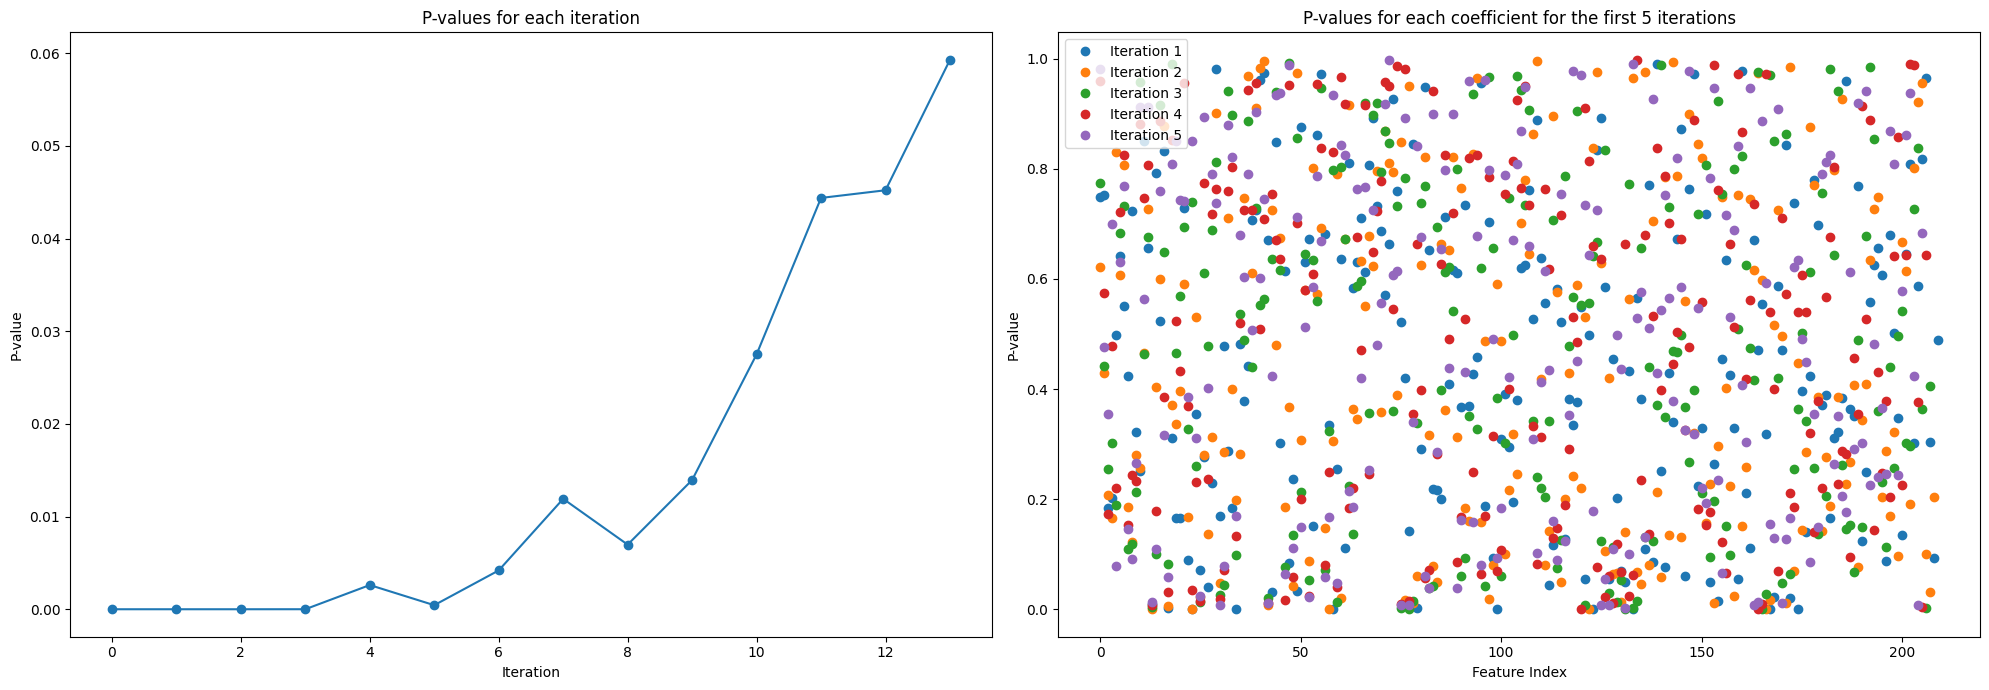

In [14]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.plot(p_values_list, 'o-')
plt.xlabel('Iteration')
plt.ylabel('P-value')
plt.title('P-values for each iteration')

plt.subplot(1, 2, 2)
for i, iteration_p_values in enumerate(p_values_per_iteration[:5], start=1):
    plt.plot(iteration_p_values, 'o', label=f'Iteration {i}')
plt.xlabel('Feature Index')
plt.ylabel('P-value')
plt.title('P-values for each coefficient for the first 5 iterations')
plt.legend()

plt.tight_layout()
plt.show()

### Question 3.c
**Add a halting condition to the algorithm: Stop adding features to the set $S$ when the p-value exceeds $0.05$. Plot the p-values for every coeﬃcient for the ﬁrst 5 iterations (all in the same plot).**

From the plot above, it makes no sense to plot the p-values for the first 5 iterations, since the p-values are all below 0.05. Therefore, the plot of the p-values was done for more iterations.

---
# Extensions

## Question 4

**Run Ridge Regression using `scikit-learn` on the training set. Run the code for $30$ different values of the penalty parameter, which should be on a logarithmic scale between $10^{-1}$ and $10^{6}$.**

The Ridge regression model is defined as:
$$
\hat \theta^{\text{Ridge}} = 
\arg\min_{\theta \in \mathbb{R}^d} \frac{1}{2} \left\|\hat y - y \right\|^2 + \lambda \left\| \theta \right\|^2_2 = 
\arg\min_{\theta \in \mathbb{R}^d} \frac{1}{2} \left\| X \theta - y \right\|^2 + \lambda \left\| \theta \right\|^2_2
$$


In [15]:
alphas = np.logspace(-1, 6, 30)

coefficients = []
r2_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    ridge.fit(X_train_scaled, y_train_scaled)

    coefficients.append(ridge.coef_.flatten())
    r2_scores.append(r2_score(y_test_scaled, ridge.predict(X_test_scaled)))

### Question 4.a and 4.b

**Display two subplots at the end:**

* **The first subplot should show the evolution of the coefficients for each different value of the penalty parameter.**

* **The second subplot should display the evolution of the R-squared coefficient at each of the $30$ iterations.**

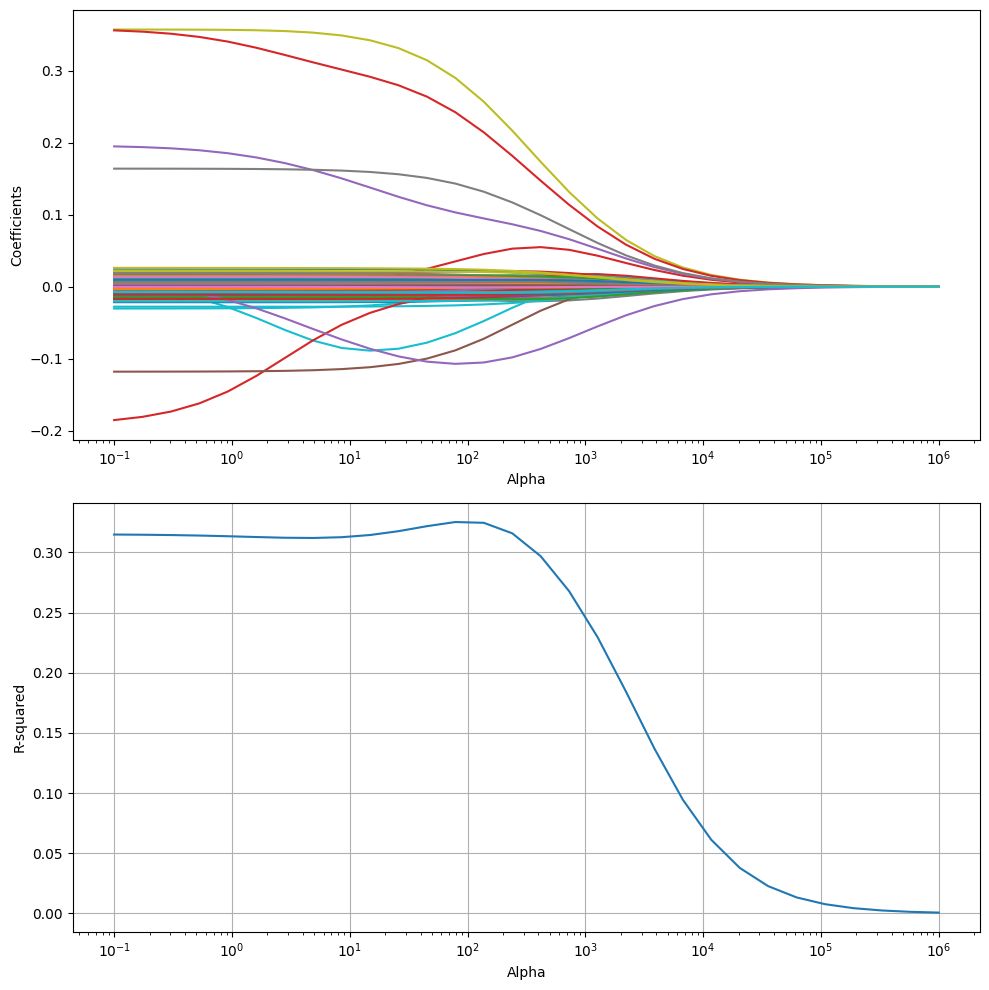

In [16]:
# Create two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot alpha values against coefficients
ax[0].plot(alphas, coefficients)
ax[0].set_xscale('log')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Coefficients')

# Plot alpha values against R-squared scores
ax[1].plot(alphas, r2_scores)
ax[1].set_xscale('log')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('R-squared')
ax[1].grid()

plt.tight_layout()
plt.show()

**Since we are going to perform similar tasks for Lasso and Elastic Net, it is mandatory to write this code as an independent function that can be parameterized for each speciﬁc case.**

In [17]:
def run_model(model, alpha_start, alpha_end, X_train, y_train, X_test, y_test):

    alphas = np.logspace(alpha_start, alpha_end, 30)

    coefficients = []
    r2_scores = []

    for alpha in alphas:

        reg = model(alpha=alpha)
        reg.fit(X_train, y_train)
        coefficients.append(reg.coef_)
        r2_scores.append(r2_score(y_test, reg.predict(X_test)))

    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    ax[0].plot(alphas, coefficients)
    ax[0].set_xscale('log')
    ax[0].set_xlabel('Alpha')
    ax[0].set_ylabel('Coefficients')

    ax[1].plot(alphas, r2_scores)
    ax[1].set_xscale('log')
    ax[1].set_xlabel('Alpha')
    ax[1].set_ylabel('R-squared')
    ax[1].grid()

    plt.tight_layout()
    plt.show()

### Question 5

**Run the code for Lasso as explained in Point $4$. Run the code for $30$ different values of the penalty parameter, which should be on a logarithmic scale between $10^{-3}$ and $10^{2}$.**

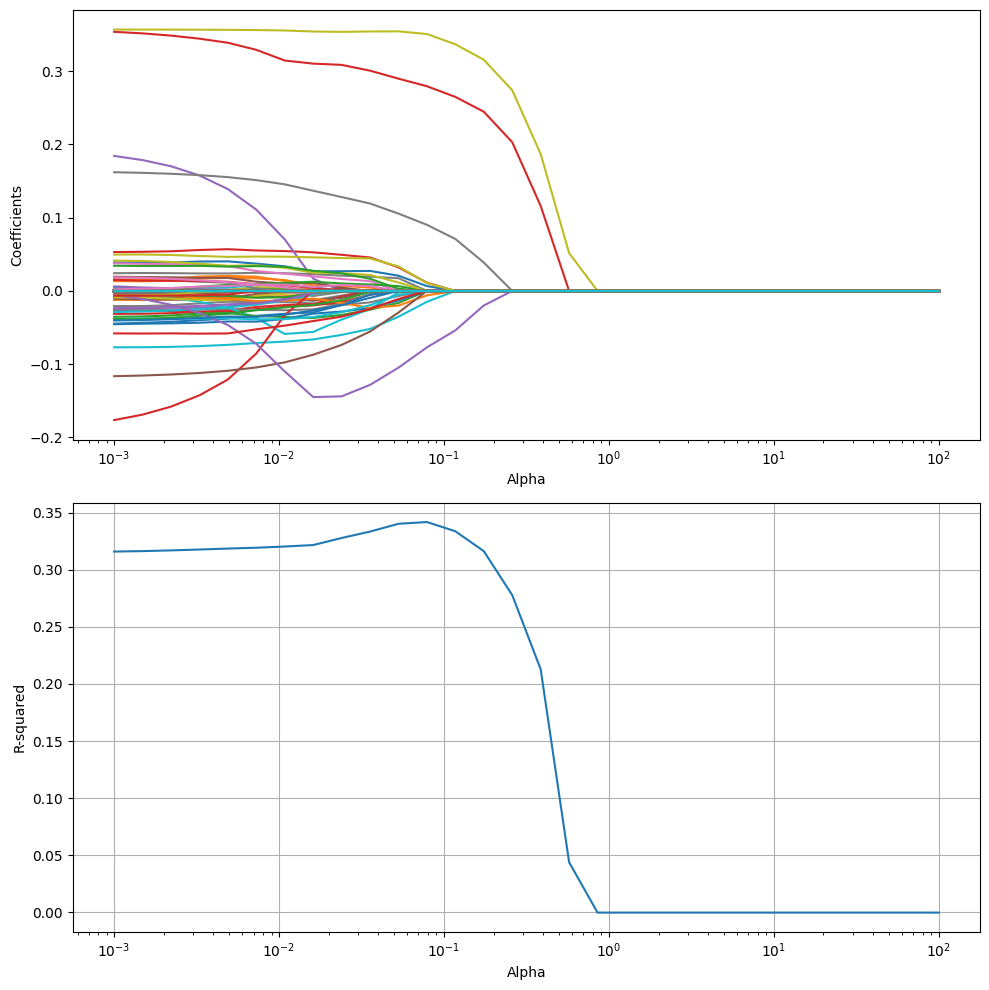

In [18]:
# Run Lasso regression
run_model(Lasso, -3, 2, X_train_scaled,
          y_train_scaled, X_test_scaled, y_test_scaled)

### Question 6

**Run the code for ElasticNet as explained in Point $4$. Run the code for $30$ different values of the penalty parameter, which should be on a logarithmic scale between $10^{-3}$ and $10^{2}$.**

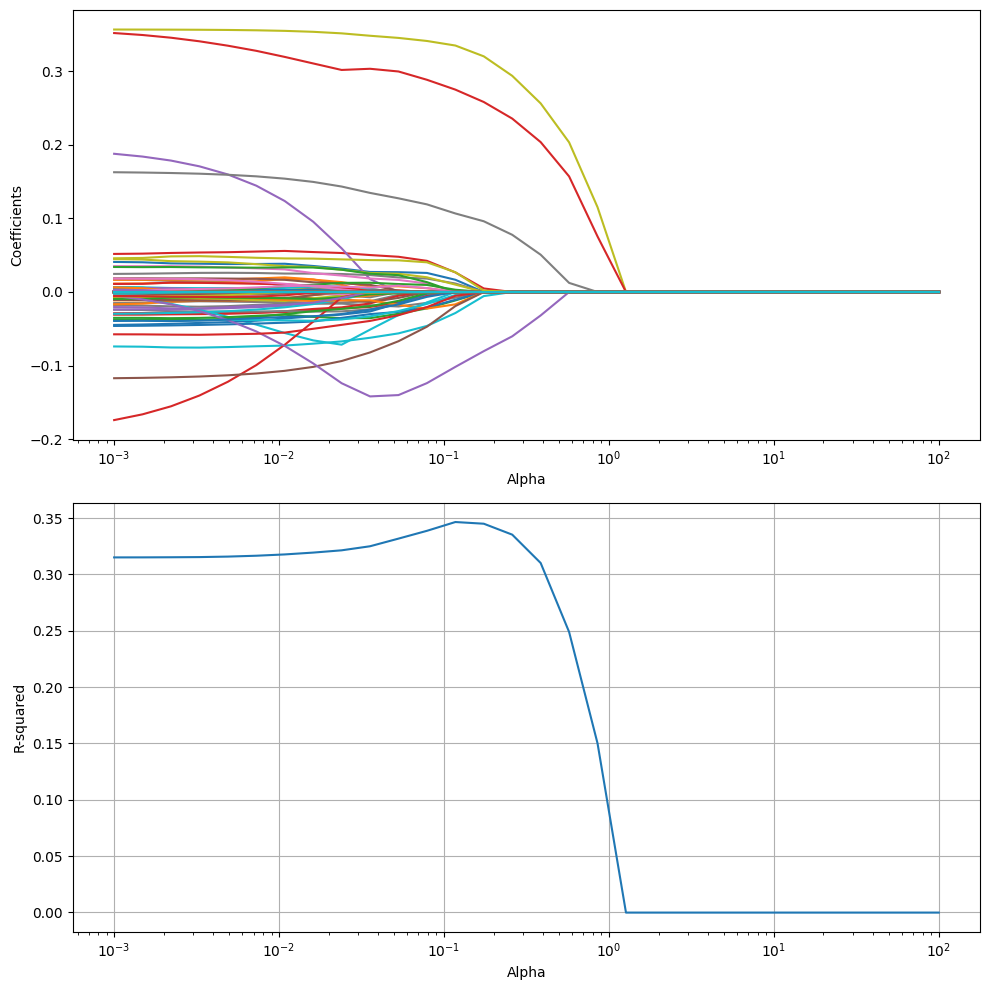

In [19]:
# Run the code for ElasticNet
run_model(ElasticNet, -3, 2, X_train_scaled,
          y_train_scaled, X_test_scaled, y_test_scaled)

---
# PCA

## Question 7

**Compute the singular value decomposition of the covariance matrix. For consistency in the notation use $U, s, V = SVD(X^{T}X)$.**

In [20]:
# Covariance matrix
cov_matrix = np.dot(X_train_scaled.T, X_train_scaled)

# SVD of the covariance matrix
U, s, V = np.linalg.svd(cov_matrix)

### Question 7.a

**Plot a heatmap of the covariance matrix.**

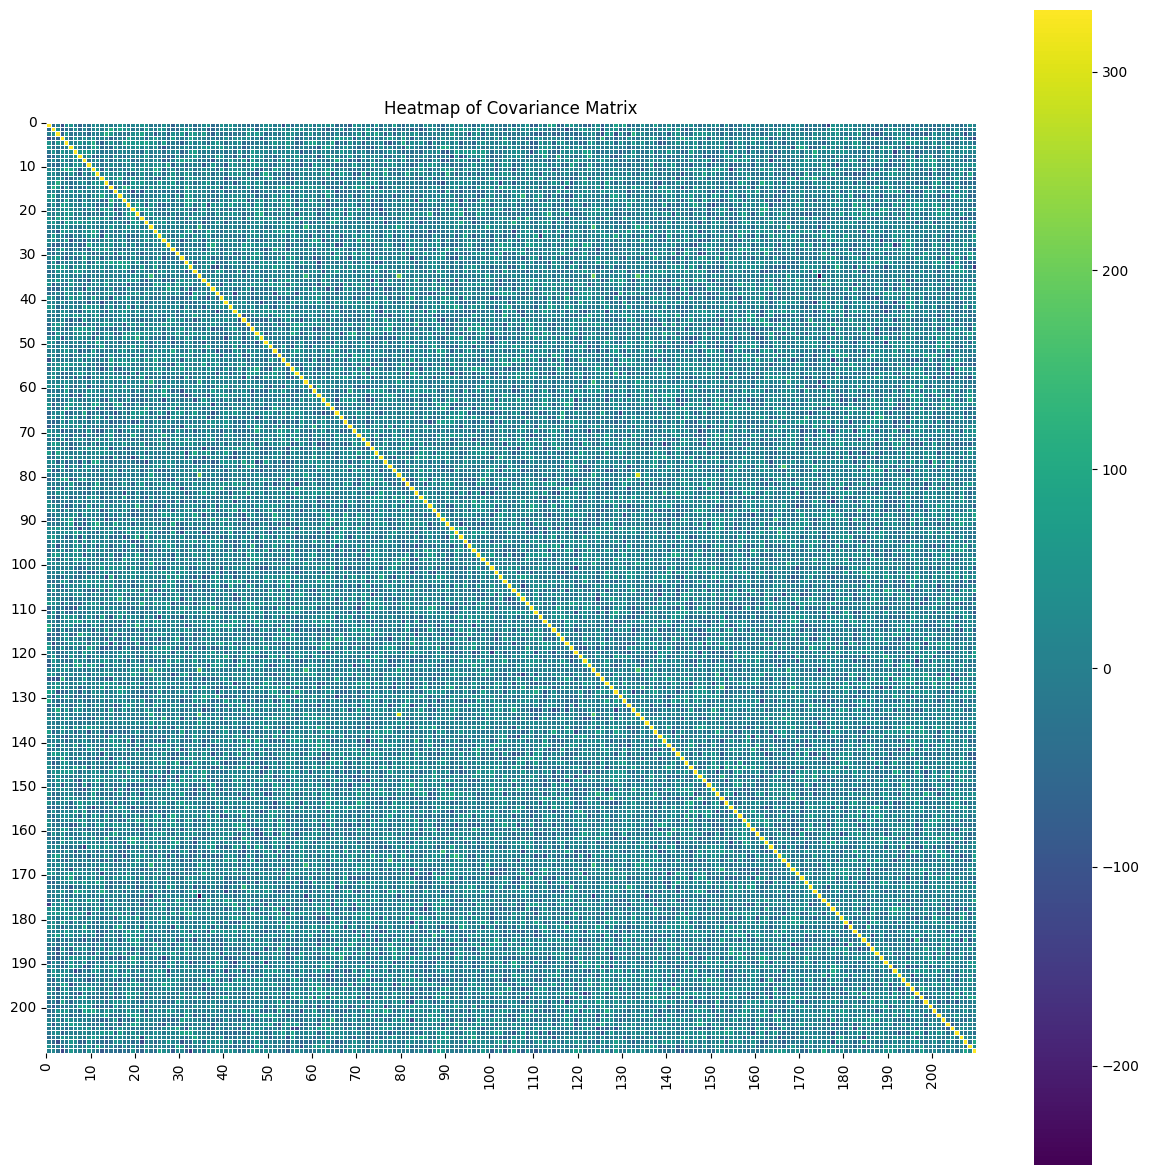

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(cov_matrix, annot=False, fmt=".1f",
            cmap='viridis', square=True, linewidths=.5)
plt.title('Heatmap of Covariance Matrix')

# Assuming we want to show every 10th label for a matrix of size 200
ticks = np.arange(0, len(cov_matrix), 10)
plt.xticks(ticks, labels=ticks)
plt.yticks(ticks, labels=ticks)

plt.show()

### Question 7.b

**Compute the PCA for the data using the SVD.**

In [22]:
data_PCA = PCA(n_components=len(s)).fit_transform(X_train_scaled)

In [23]:
def compute_PCA(X, k):
    X_PCA = X @ U[:, :k]
    return s[:k], X_PCA

### Question 7.c

**Plot the amount of variance explained by the first $k$ components for $k \in 2..p$. How many variables do we need to explain more than $90\%$ of the variance?**

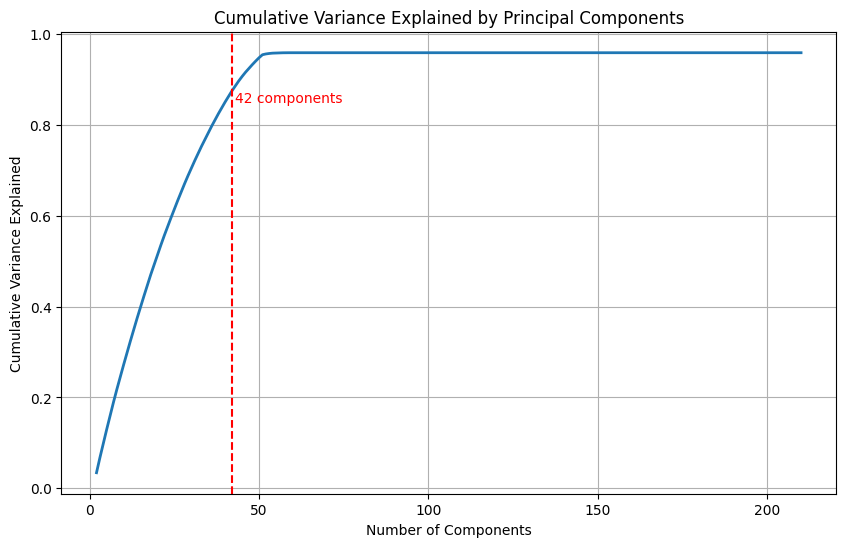

In [24]:
# Compute the variance explained by each principal component
variance_explained = (s ** 2) / np.sum(s ** 2)

# Plot the variance explained by the first k components
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(2, len(variance_explained) + 1),
         np.cumsum(variance_explained[1:]), linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid()

# Find the number of components needed to explain more than 90% of the variance
num_components = np.argmax(np.cumsum(variance_explained) > 0.9) + 2
plt.axvline(x=num_components, color='r', linestyle='--')
plt.text(num_components + 1, 0.85, f'{num_components} components', color='r')

plt.show()

In the displayed graph, it's clear that slightly less than $50$ components, are required to explain most of the variance in the data, as the curve shows a plateau beyond this point. This method is known as the *Elbow Method*.

### Question 7.d

**Plot the projected data with $k = 2$ using as color the value of $y$ and interpret the plot.**

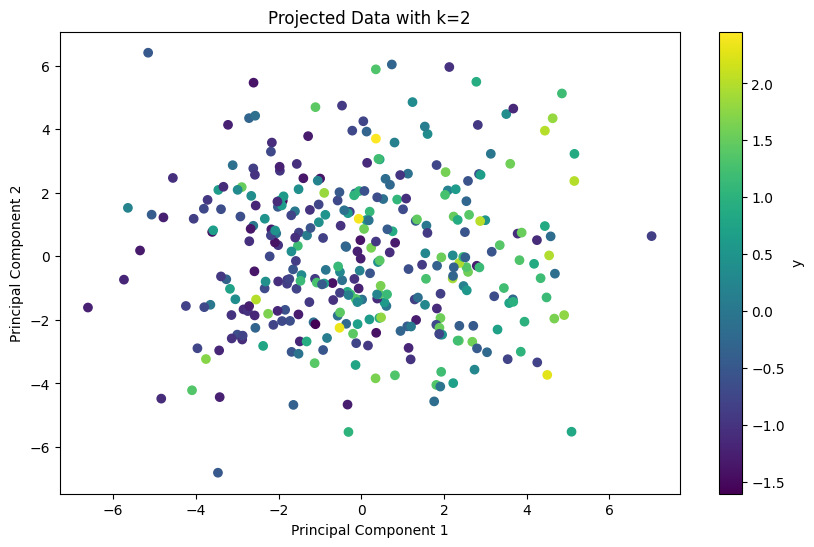

In [25]:
k = 2
principal_components = X_train_scaled @ U[:, :k]

plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(principal_components[:, 0],
            principal_components[:, 1], c=y_train_scaled)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data with k=2')
plt.colorbar(label='y')
plt.show()

### Question 7.e

**Plot the the two first principal directions.**

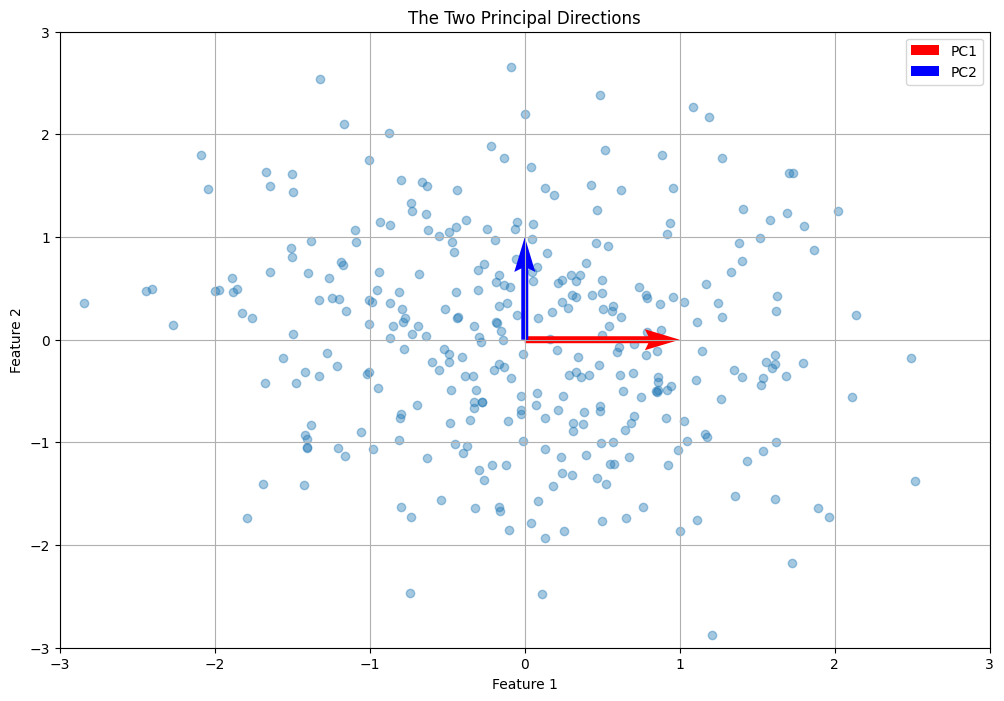

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], alpha=0.4)

# First principal direction
plt.quiver(0, 0, V[:, 0] @ V[:, 0], V[:, 0] @ V[:, 1],
           angles='xy', scale_units='xy', scale=1, color='r', label='PC1')

# Second principal direction
plt.quiver(0, 0, V[:, 1] @ V[:, 0], V[:, 1] @ V[:, 1],
           angles='xy', scale_units='xy', scale=1, color='b', label='PC2')

plt.title('The Two Principal Directions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.grid(True)

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### Question 7.f

**Run OLS on the projected data (PCR) using $k$ components for $k < 50$. Select the $k$ that returns the best score of the OLS model and plot the evolution of the scores with $k$.**

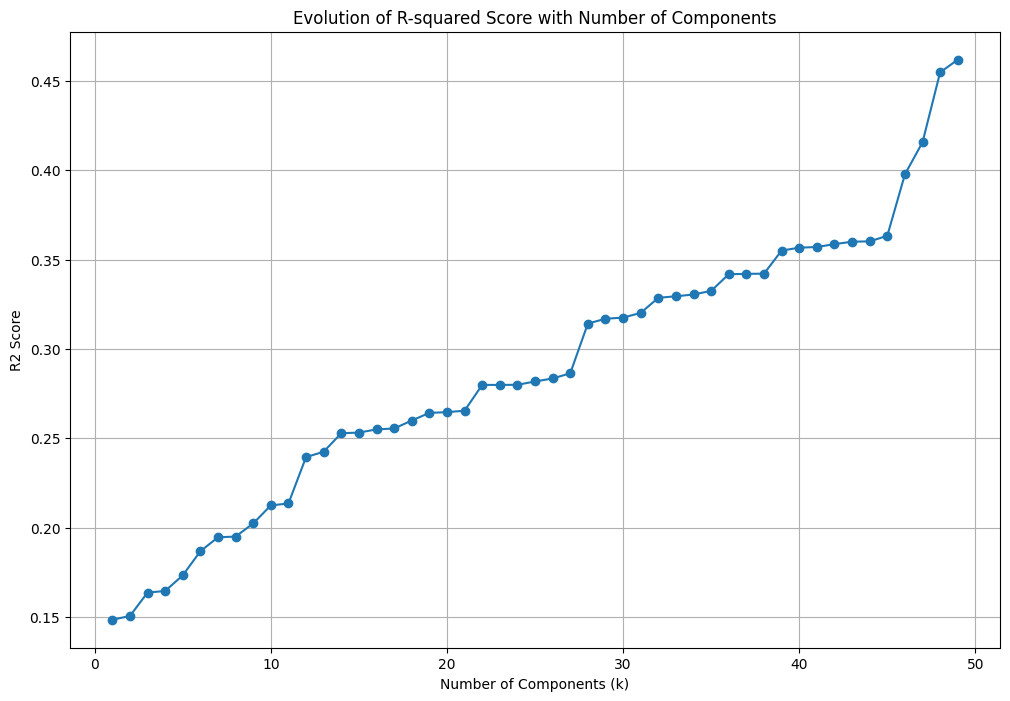

The best k is 49 with an R-squared score of 0.462


In [27]:
best_score = 0
best_k = 0
scores = []

for k in range(1, 50):
    # Project the data onto k principal components
    principal_components = X_train_scaled @ U[:, :k]

    # Fit OLS model
    ols = LinearRegression()
    ols.fit(principal_components, y_train_scaled)

    # Predict using the OLS model
    y_pred_scaled = ols.predict(principal_components)

    # Calculate R-squared score
    score = r2_score(y_train_scaled, y_pred_scaled)

    # Store the score and update the best score and k if necessary
    scores.append(score)
    if score > best_score:
        best_score = score
        best_k = k

# Plot the evolution of the scores with k
plt.figure(figsize=(12, 8))
plt.plot(range(1, 50), scores, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('R2 Score')
plt.title('Evolution of R-squared Score with Number of Components')
plt.grid(True)
plt.show()

# Print the best k and its corresponding score
print(f"The best k is {best_k} with an R-squared score of {best_score:.3f}")

---
# Comparison of the models

## Question 8

**Summarize the results of the models and elaborate in their main characteristics. Plot all the training and testing errors for all the models considered and elaborate on the results.**

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

# Initialize the models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
# Adjust n_components as needed
pca = make_pipeline(PCA(n_components=10), LinearRegression())
fvs = make_pipeline(SelectKBest(score_func=f_regression, k=10),
                    LinearRegression())  # Adjust k as needed

# Fit and predict for each model
models = [lr, ridge, lasso, elastic_net, pca, fvs]
y_preds_train = []
y_preds_test = []
for model in models:
    model.fit(X_train, y_train)
    y_preds_train.append(model.predict(X_train))
    y_preds_test.append(model.predict(X_test))

# Calculate the metrics
scores_test = [r2_score(y_test, y_pred) for y_pred in y_preds_test]
mses_test = [mean_squared_error(y_test, y_pred) for y_pred in y_preds_test]

scores_train = [r2_score(y_train, y_pred) for y_pred in y_preds_train]
mses_train = [mean_squared_error(y_train, y_pred) for y_pred in y_preds_train]

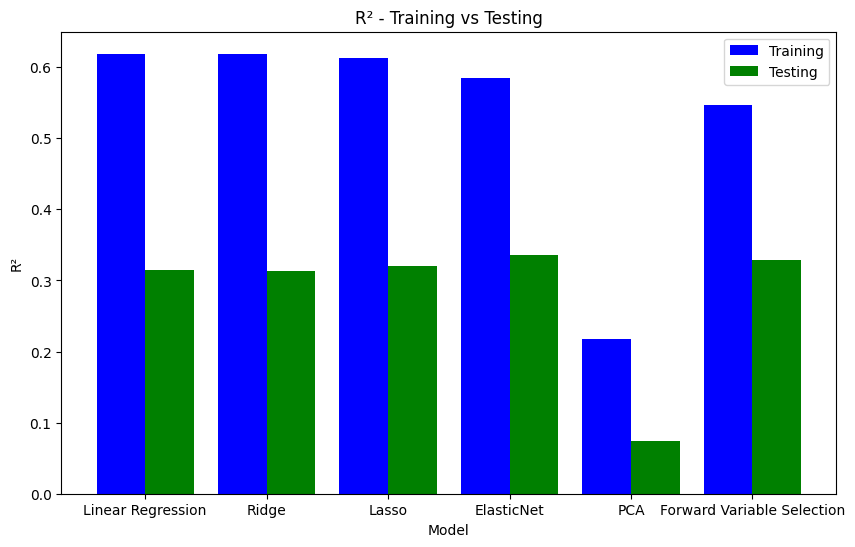

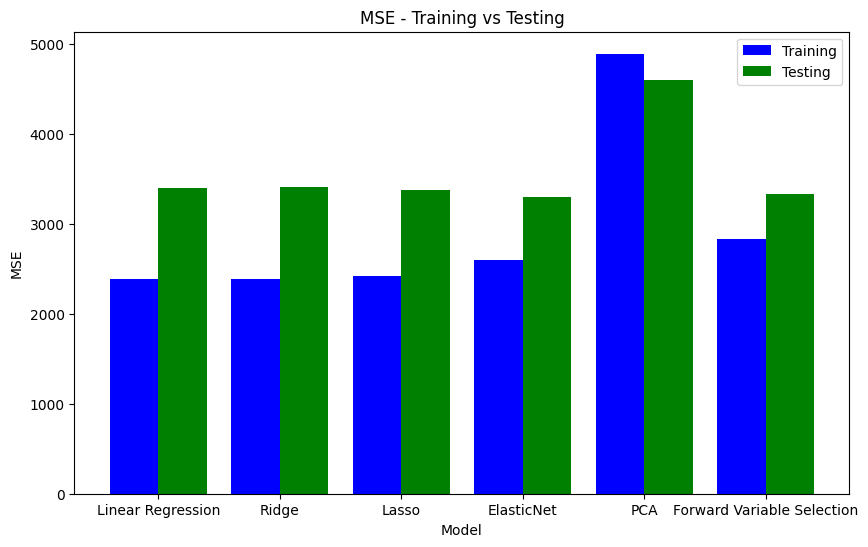

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names
models = ['Linear Regression', 'Ridge', 'Lasso',
          'ElasticNet', 'PCA', 'Forward Variable Selection']

# Plot R² scores
plt.figure(figsize=(10, 6))
plt.bar(models, scores_train, color='blue', width=0.4, label='Training')
plt.bar(np.arange(len(models)) + 0.4, scores_test,
        color='green', width=0.4, label='Testing')
plt.title('R² - Training vs Testing')
plt.xlabel('Model')
plt.ylabel('R²')
plt.xticks(np.arange(len(models)) + 0.2, models)
plt.legend()
plt.show()

# Plot MSEs
plt.figure(figsize=(10, 6))
plt.bar(models, mses_train, color='blue', width=0.4, label='Training')
plt.bar(np.arange(len(models)) + 0.4, mses_test,
        color='green', width=0.4, label='Testing')
plt.title('MSE - Training vs Testing')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(np.arange(len(models)) + 0.2, models)
plt.legend()
plt.show()